In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statistics

## 1. MEAN , MEDIAN AND MODE

In [3]:
df=sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# 1. Mean
np.mean(df['total_bill'])

19.78594262295082

In [6]:
np.median(df['total_bill'])

17.795

In [7]:
statistics.mode(df['total_bill'])

13.42

## 2. BOX PLOT

<Axes: ylabel='total_bill'>

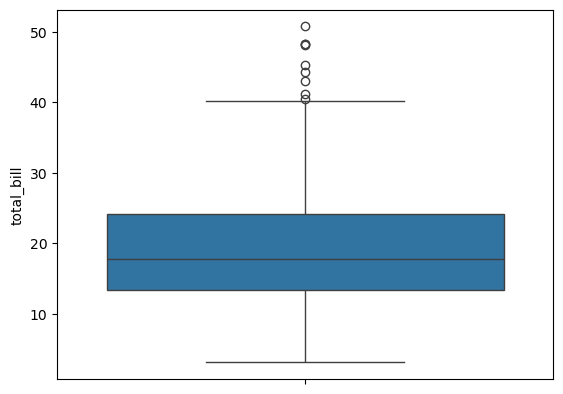

In [8]:
sns.boxplot(df['total_bill'])

## 3. HISTOGRAM

<Axes: xlabel='total_bill', ylabel='Count'>

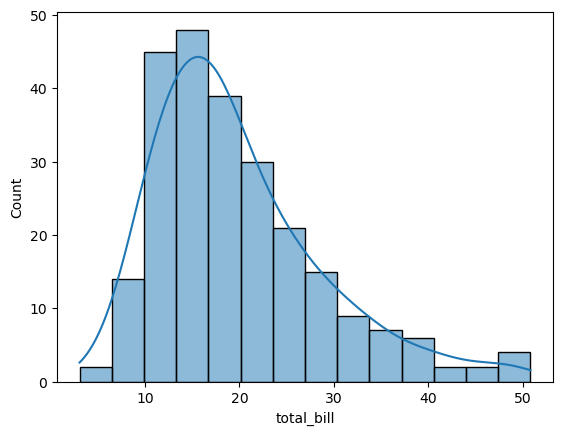

In [9]:
sns.histplot(df['total_bill'],kde=True)

In [10]:
# the data is not normally distributed

In [11]:
df1=sns.load_dataset('iris')

In [12]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

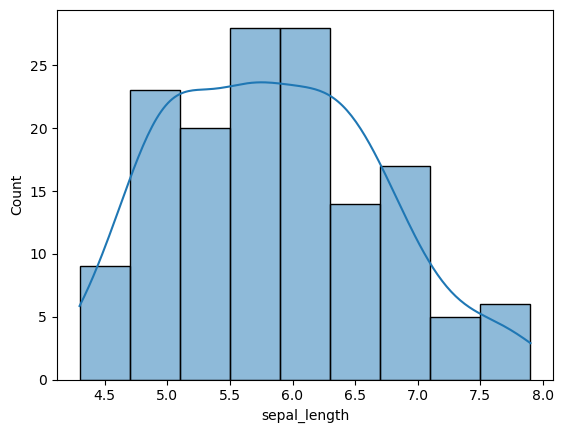

In [13]:
sns.histplot(df1['sepal_length'],kde=True)

In [14]:
# not normally distributed

<Axes: xlabel='sepal_width', ylabel='Count'>

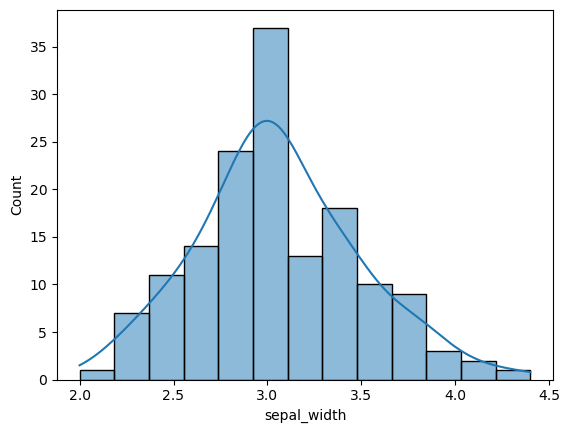

In [15]:
sns.histplot(df1['sepal_width'],kde = True)

In [16]:
# this is normally distributed

## 4. BARGRAPH/BARPLOT

<Axes: xlabel='count', ylabel='species'>

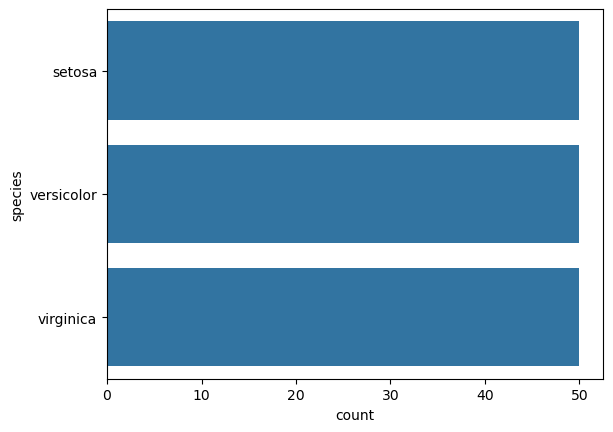

In [17]:
sns.countplot(df1['species'])

## 5. PERCENTILE

In [18]:
np.percentile(df1['sepal_length'],[25,75])
# here 25 and 7s are parameters which can be changed

array([5.1, 6.4])

## 6. OUTLIERS

In [19]:
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [20]:
# Program to find outliers
outliers=[]

def detect_outliers(data):
    # take third standard deviation as threshold
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        # calculate z_score
        z_score=(i-mean)/std
        #if z_score for i value is greater than thershold value than that value is an outlier
        if np.abs(z_score)>threshold:
            outliers.append(i) 
            
    return outliers
        

In [21]:
detect_outliers(dataset)

[102, 107, 108]

## IQR

1. Sort the data
2. calculate Q1 and Q3
3. IQR(Q3-Q1)
4. Find the LowerFence (Q1-1.5(IQR))
5. Find the UpperFence (Q3+1.5(IQR))

In [22]:
# 1. Sorting the dataset
dataset=sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [23]:
# 2. Finding Q1 and Q2
Q1,Q3=np.percentile(dataset,[25,75])
print(Q1,Q3)

12.0 15.0


In [24]:
# 3. Finding the IQR
IQR = Q3 - Q1
print(IQR)

3.0


In [25]:
# 4. Find the lowerFence
LowerFence=Q1-(1.5*IQR)
print(LowerFence)

7.5


In [26]:
# 4. Find the UpperFence
UpperFence=Q3+(1.5*IQR)
print(UpperFence)

19.5


<Axes: >

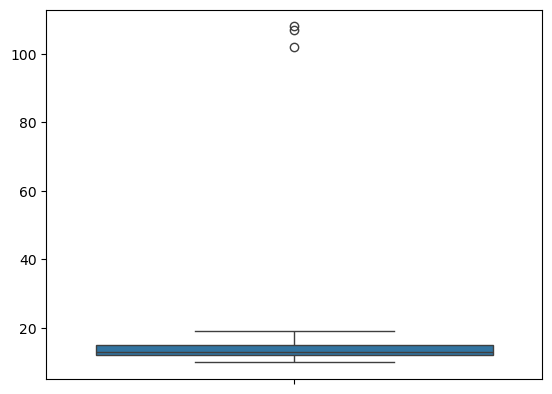

In [27]:
# Boxplot befor Outlier
sns.boxplot(dataset)

In [28]:
# approach 2
# dataset1=[]
# for i in dataset:
#     if i<19.5 and i>7.5:
#         dataset1.append(i)
        
# print(dataset1)

In [29]:
for i in dataset:
    if i>19.5 or i<7.5:
        dataset.remove(i)
        
print(dataset)


[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 107]


<Axes: >

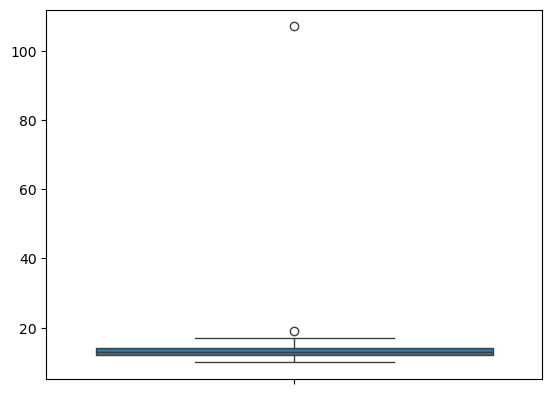

In [30]:
# Boxplot after removing outliers
sns.boxplot(dataset)

# Z Test

Suppose the IQ in a certain population is normally distributed with a mean of 100 and a standard deviation of 15.
A researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try and records their IQ levels.
The following code shows how to perform a one sample z-test in python to determine if the new drug caused a significant difference in IQ levels.

In [33]:
from statsmodels.stats.weightstats import ztest as ztest

# Enter IQ levels for 20 patients
data=[88,92,94,94,96,97,97,97,99,99,105,109,109,109,110,112,112,113,114,115]

ztest(data,value=100)

(1.5976240527147705, 0.1101266701438426)

In [1]:
# 0.11 id grater than 0.05 so we reject thee null hypothesis

# T Text

In [2]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [3]:
ages_mean=np.mean(ages)
ages_mean

<IPython.core.display.Javascript object>

30.34375

In [5]:
sample_size=10
age_sample=np.random.choice(ages,sample_size)
age_sample

<IPython.core.display.Javascript object>

array([28, 18, 43, 35, 40, 20, 55, 21, 20, 17])

In [6]:
from scipy.stats import ttest_1samp

In [10]:
ttest_1samp(age_sample,30)

TtestResult(statistic=-0.07309347096463878, pvalue=0.9433304266472579, df=9)

In [11]:
ttest_1samp(age_sample,31)

TtestResult(statistic=-0.31673837418010076, pvalue=0.7586657198098847, df=9)

In [12]:
ttest_1samp(age_sample,28)

TtestResult(statistic=0.4141963354662852, pvalue=0.6884274856688961, df=9)

In [13]:
# Consider another example 
# Ages of the college students(population)
# 1 class student means of all the ages


In [14]:
import scipy.stats as stats
import math

np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

<IPython.core.display.Javascript object>

In [16]:
school_ages

array([62, 59, 44, ..., 45, 52, 50], dtype=int64)

In [17]:
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45], dtype=int64)

In [18]:
classA_ages.mean()

46.9

In [19]:
ttest_1samp(classA_ages,popmean=school_ages.mean())

TtestResult(statistic=-9.604796510704091, pvalue=1.139027071016194e-13, df=59)

In [20]:
school_ages.mean()

53.303333333333335

In [32]:
if p_value<=0.05:
    print("Reject")
else:
    print("Accept")

NameError: name 'p_value' is not defined

In [26]:
df=sns.load_dataset("iris")
df.head()

<IPython.core.display.Javascript object>

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
df.corr()

ValueError: could not convert string to float: 'setosa'

<IPython.core.display.Javascript object>

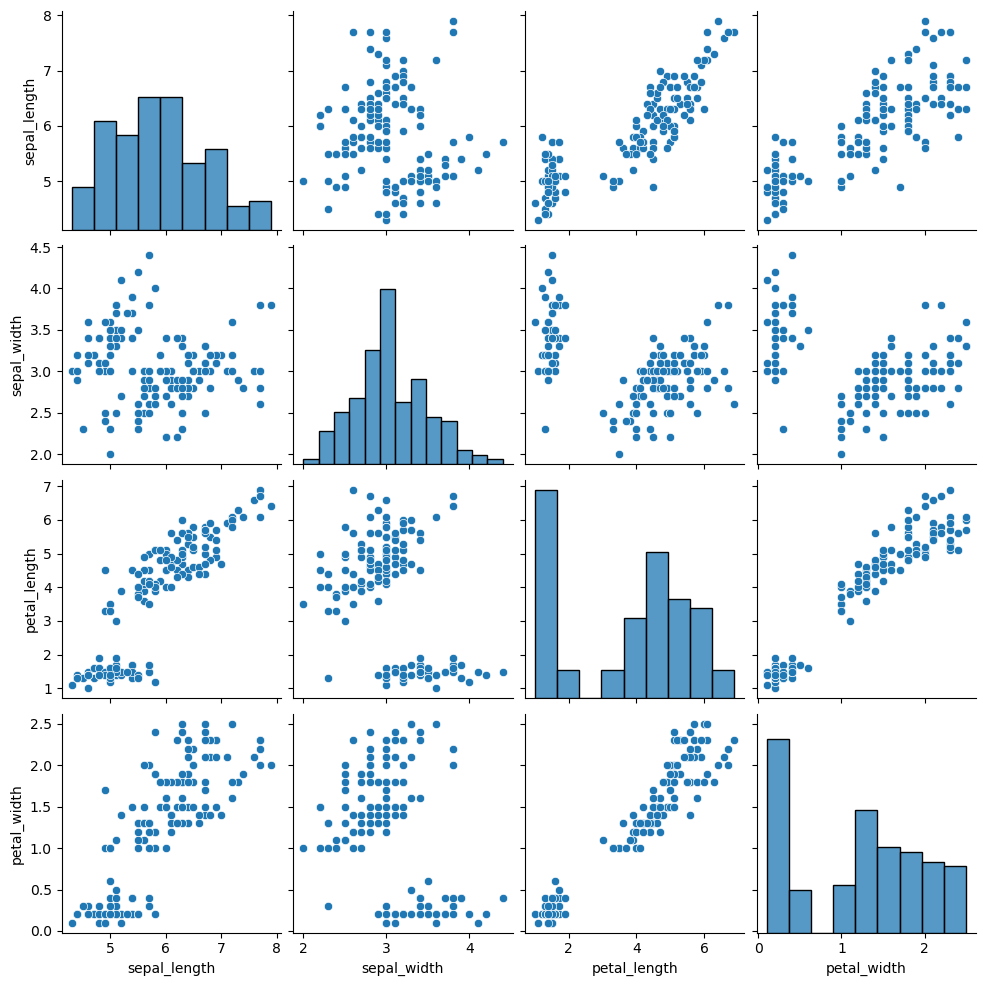

In [31]:
sns.pairplot(df)